# Assessing RMSF and RMSD of MD simulation

Usage: function plotting will plot rmsd, rmsd histogram, rmsf and PCA projection

In [2]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [3]:
residue_selection = 'resSeq 8 to 316'

In [4]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']

In [39]:
def create_md_dataframe():    
    md_data = pd.DataFrame(columns=list(['MD_name','pH','replicate','resid']))
    return md_data

In [40]:
def create_metadata(md_data= None):   
    def append_metadata(traj_note,location = '/media/scottzhuang/data/MD/',skip=10,md_data= md_data):
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        if skip == 1:
            traj = md.load(location + traj_location,top= location + top_location,stride=10)
        else:
            traj = md.load(location + traj_location,top= location + top_location)
        md_name = traj_note[:traj_note.find('pH')-1]
        pH = traj_note[traj_note.find('pH')+2:traj_note.find('pH')+4]
        md_replicate = traj_note[-1]
        for i in range(0,int(traj.n_residues/5)):
            md_data.loc[md_data.shape[0]+1] = [md_name,pH,md_replicate,i + 8]
    for traj_note in traj_notes:
        append_metadata(traj_note)
        

In [41]:
def create_system_notation(md_data = None):
    system_notation = 0
    notation = 0
    location = '/media/scottzhuang/data/MD/'
    skip=10
    notations = []
    increment = 0
    for traj_note in traj_notes:
        top_location = traj_note + '/' + traj_note + ".ca.gro"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        for frame in range(0,int(traj.n_residues/5)):
            notations.append(notation)
        if increment % 3 == 2:
            notation = notation + 1
        increment = increment + 1 
    md_data['system'] = notations

In [52]:
def create_rmsf_data(md_data = None):
    def append_rmsf_data(traj_note,location = '/media/scottzhuang/data/MD/', skip=10):
        top_location = traj_note + '/' + traj_note + ".ca.pdb"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top= location + top_location)
        traj = traj[30:50]
        traj = traj.atom_slice(traj.topology.select('chainid 4'))
        traj.superpose(traj,0)
        avg_xyz = np.mean(traj.xyz[:, :, :], axis=0)
        rmsf = np.sqrt(3*np.mean((traj.xyz[:, :, :] - avg_xyz)**2, axis=(0,2)))   
        rmsf_data.extend(rmsf)
    rmsf_data = []
    for traj_note in traj_notes:
        append_rmsf_data(traj_note)
    md_data["rmsf_chain_five"] = rmsf_data

In [43]:
md_data_resid = create_md_dataframe()
create_metadata(md_data = md_data_resid)

In [44]:
create_system_notation(md_data_resid)

In [53]:
create_rmsf_data(md_data_resid)

In [55]:
md_data_resid.to_csv("glic_gating_resid_subunit.csv")

In [5]:
md_data_resid = pd.read_csv("glic_gating_resid_subunit.csv")

In [46]:
md_data = pd.read_csv("glic_gating_resid_subunit.csv")

In [47]:
md_data['rmsf_avg'] = md_data[['rmsf_chain_one', 'rmsf_chain_two', 'rmsf_chain_three',
       'rmsf_chain_four', 'rmsf_chain_five']].mean(axis=1)

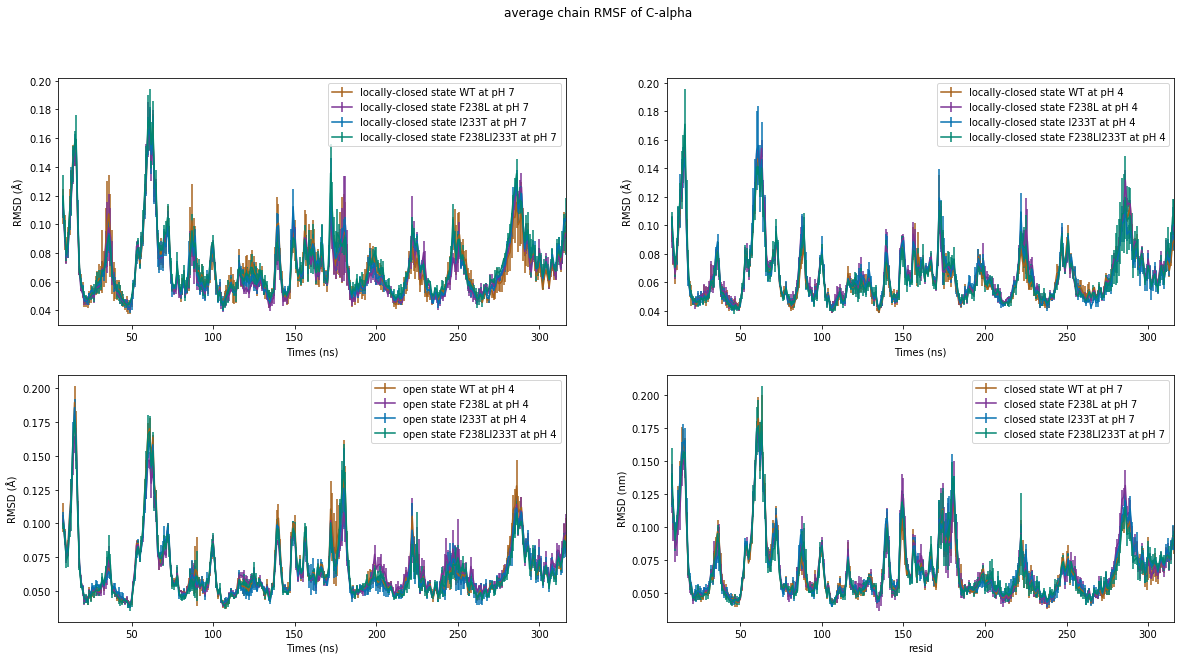

In [54]:
fig, axes = plt.subplots(2, 2,figsize=(20, 10))
group = md_data[md_data['system'] ==0].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#a6611a',label='locally-closed state WT at pH 7')
group = md_data[md_data['system'] ==1].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#7b3294',label='locally-closed state F238L at pH 7')
group = md_data[md_data['system'] ==2].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#0571b0',label='locally-closed state I233T at pH 7')
group = md_data[md_data['system'] ==3].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#018571',label='locally-closed state F238LI233T at pH 7')

axes[0,0].set_xlim(5,316)
axes[0,0].set_xlabel('Times (ns)')
axes[0,0].set_ylabel('RMSD (Å)')
axes[0,0].legend()
group = md_data[md_data['system'] ==4].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#a6611a',label='locally-closed state WT at pH 4')
group = md_data[md_data['system'] ==5].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#7b3294',label='locally-closed state F238L at pH 4')
group = md_data[md_data['system'] ==6].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#0571b0',label='locally-closed state I233T at pH 4')
group = md_data[md_data['system'] ==7].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#018571',label='locally-closed state F238LI233T at pH 4')
axes[0,1].set_xlim(5,316)
axes[0,1].set_xlabel('Times (ns)')
axes[0,1].set_ylabel('RMSD (Å)')
axes[0,1].legend()
group = md_data[md_data['system'] ==8].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#a6611a',label='open state WT at pH 4')
group = md_data[md_data['system'] ==9].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#7b3294',label='open state F238L at pH 4')
group = md_data[md_data['system'] ==10].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#0571b0',label='open state I233T at pH 4')
group = md_data[md_data['system'] ==11].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#018571',label='open state F238LI233T at pH 4')
axes[1,0].set_xlim(5,316)
axes[1,0].set_xlabel('Times (ns)')
axes[1,0].set_ylabel('RMSD (Å)')
axes[1,0].legend()

group = md_data[md_data['system'] ==12].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#a6611a',label='closed state WT at pH 7')
group = md_data[md_data['system'] ==13].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#7b3294',label='closed state F238L at pH 7')
group = md_data[md_data['system'] ==14].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#0571b0',label='closed state I233T at pH 7')
group = md_data[md_data['system'] ==15].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#018571',label='closed state F238LI233T at pH 7')
axes[1,1].set_xlim(5,316)
axes[1,1].set_xlabel('resid')
axes[1,1].set_ylabel('RMSD (nm)')
axes[1,1].legend()

plt.suptitle('average chain RMSF of C-alpha')

plt.savefig('plots/rmsf.pdf')

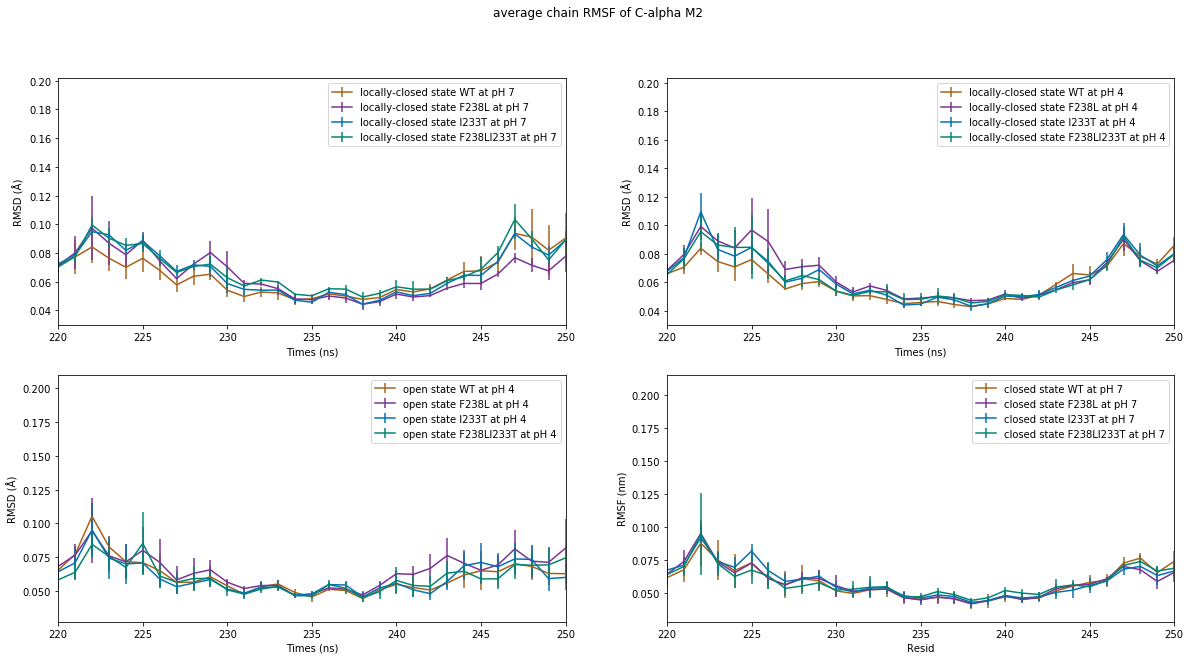

In [53]:
fig, axes = plt.subplots(2, 2,figsize=(20, 10))
group = md_data[md_data['system'] ==0].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#a6611a',label='locally-closed state WT at pH 7')
group = md_data[md_data['system'] ==1].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#7b3294',label='locally-closed state F238L at pH 7')
group = md_data[md_data['system'] ==2].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#0571b0',label='locally-closed state I233T at pH 7')
group = md_data[md_data['system'] ==3].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,0],c='#018571',label='locally-closed state F238LI233T at pH 7')

axes[0,0].set_xlim(220,250)
axes[0,0].set_xlabel('Times (ns)')
axes[0,0].set_ylabel('RMSD (Å)')
axes[0,0].legend()
group = md_data[md_data['system'] ==4].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#a6611a',label='locally-closed state WT at pH 4')
group = md_data[md_data['system'] ==5].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#7b3294',label='locally-closed state F238L at pH 4')
group = md_data[md_data['system'] ==6].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#0571b0',label='locally-closed state I233T at pH 4')
group = md_data[md_data['system'] ==7].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[0,1],c='#018571',label='locally-closed state F238LI233T at pH 4')
axes[0,1].set_xlim(220,250)
axes[0,1].set_xlabel('Times (ns)')
axes[0,1].set_ylabel('RMSD (Å)')
axes[0,1].legend()
group = md_data[md_data['system'] ==8].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#a6611a',label='open state WT at pH 4')
group = md_data[md_data['system'] ==9].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#7b3294',label='open state F238L at pH 4')
group = md_data[md_data['system'] ==10].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#0571b0',label='open state I233T at pH 4')
group = md_data[md_data['system'] ==11].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,0],c='#018571',label='open state F238LI233T at pH 4')
axes[1,0].set_xlim(220,250)
axes[1,0].set_xlabel('Times (ns)')
axes[1,0].set_ylabel('RMSD (Å)')
axes[1,0].legend()

group = md_data[md_data['system'] ==12].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#a6611a',label='closed state WT at pH 7')
group = md_data[md_data['system'] ==13].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#7b3294',label='closed state F238L at pH 7')
group = md_data[md_data['system'] ==14].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#0571b0',label='closed state I233T at pH 7')
group = md_data[md_data['system'] ==15].groupby(['resid'])['rmsf_avg']
mean = group.mean()
errors = group.std()
mean.plot(yerr=errors,ax=axes[1,1],c='#018571',label='closed state F238LI233T at pH 7')
axes[1,1].set_xlim(220,250)
axes[1,1].set_xlabel('Resid')
axes[1,1].set_ylabel('RMSF (nm)')
axes[1,1].legend()

plt.suptitle('average chain RMSF of C-alpha M2')

plt.savefig('plots/rmsf_M2.pdf')